In [1]:
import os
import bigframes.pandas as bf
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.cloud import bigquery
from statsmodels.stats.proportion import proportions_ztest

In [2]:
bf.options.bigquery.project = 'credit-business-on-demand-9fd5'

In [3]:
# Atenção para >= DATE '2024-08-01'
query_tomado_kgiro = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.documento_kgiro_estudo_vencedores`"""
df_tomado_kgiro = bf.read_gbq(query_tomado_kgiro)
base_tomado_kgiro = df_tomado_kgiro.to_pandas()

base_tomado_kgiro['RootDocumentNumber'] = base_tomado_kgiro['RootDocumentNumber'].astype(int)

In [4]:
base_tomado_kgiro = base_tomado_kgiro[(base_tomado_kgiro['ReferenceMonth'].dt.date >= datetime.date(2024,9,1))&(base_tomado_kgiro['ReferenceMonth'].dt.date <= datetime.date(2025,8,1))]

In [5]:
base_tomado_kgiro['ReferenceMonth'].unique()

<ArrowExtensionArray>
[datetime.date(2024, 12, 1), datetime.date(2024, 10, 1),
  datetime.date(2025, 2, 1),  datetime.date(2024, 9, 1),
  datetime.date(2025, 5, 1),  datetime.date(2025, 4, 1),
  datetime.date(2025, 1, 1),  datetime.date(2025, 8, 1),
  datetime.date(2025, 3, 1), datetime.date(2024, 11, 1),
  datetime.date(2025, 6, 1),  datetime.date(2025, 7, 1)]
Length: 12, dtype: date32[day][pyarrow]

In [6]:
query_over30mob3 = f"""  SELECT *
  FROM `dataplatform-nonprd.credit_negocios.Over30mob3_com_problema`"""
df_over30mob3 = bf.read_gbq(query_over30mob3)
base_over30mob3 = df_over30mob3.to_pandas()

base_over30mob3['RootDocumentNumber'] = base_over30mob3['RootDocumentNumber'].astype(int)
base_over30mob3 = base_over30mob3[base_over30mob3['Problema'].isna()]

In [7]:
base_over30mob3['ReferenceDate'].unique()

<ArrowExtensionArray>
[ datetime.date(2024, 9, 1),  datetime.date(2024, 7, 1),
  datetime.date(2025, 3, 1),  datetime.date(2025, 1, 1),
  datetime.date(2024, 2, 1),  datetime.date(2024, 5, 1),
  datetime.date(2025, 6, 1),  datetime.date(2024, 3, 1),
 datetime.date(2024, 10, 1),  datetime.date(2025, 2, 1),
  datetime.date(2024, 6, 1), datetime.date(2024, 12, 1),
  datetime.date(2024, 1, 1),  datetime.date(2024, 8, 1),
  datetime.date(2024, 4, 1), datetime.date(2024, 11, 1),
  datetime.date(2025, 4, 1), datetime.date(2023, 12, 1),
  datetime.date(2025, 5, 1)]
Length: 19, dtype: date32[day][pyarrow]

In [8]:
query_rating = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.rating_vencedores`"""
df_rating = bf.read_gbq(query_rating)
base_rating = df_rating.to_pandas()

base_rating['RootDocumentNumber'] = base_rating['RootDocumentNumber'].astype(int)
base_rating['CreditRating_I'] = pd.to_numeric(base_rating['CreditRating'].str[:3])

In [9]:
base_rating = base_rating[(base_rating['ReferenceDate'].dt.month == 3)&(base_rating['ReferenceDate'].dt.year == 2025)]

In [10]:
query_elegibilidade = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.elegibilidade_estudo_vencedores`"""
df_elegibilidade = bf.read_gbq(query_elegibilidade)
base_elegibilidade = df_elegibilidade.to_pandas()

base_elegibilidade.sort_values(by=['document','data_application_score_processing_at'],inplace=True)
base_elegibilidade_res = base_elegibilidade.groupby(['document']).last().reset_index()
base_elegibilidade_res['RootDocumentNumber'] = base_elegibilidade_res['document'].str[:8].astype(int)


In [11]:
query_rosa_ventos = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.vencedores_rosa_ventos_junho`"""
df_rosa_ventos = bf.read_gbq(query_rosa_ventos)
base_rosa_ventos = df_rosa_ventos.to_pandas()

base_rosa_ventos['RootDocumentNumber'] = base_rosa_ventos['documento'].str[:8].astype(int)

In [ ]:
base_vencedores = pd.read_csv('base_w_desc.csv')
base_comp = pd.read_csv('base_l_desc.csv')

base_vencedores['RootDocumentNumber'] = base_vencedores['document'].astype(str).str[:8].astype(int)
base_comp['RootDocumentNumber'] = base_comp['document'].astype(str).str[:8].astype(int)

base_vencedores_cadastrados = base_vencedores[(base_vencedores['cadastro_stone'] == 1)|(base_vencedores['cadastro_ton'] == 1)]
base_comp_cadastrados = base_comp[(base_comp['cadastro_stone'] == 1)|(base_comp['cadastro_ton'] == 1)]

base_vencedores_ativos_30d = base_vencedores[(base_vencedores['ativo_30d_stone'] == 1)|(base_vencedores['ativo_30d_ton'] == 1)]
base_comp_ativos_30d = base_comp[(base_comp['ativo_30d_stone'] == 1)|(base_comp['ativo_30d_ton'] == 1)]

In [12]:
base_vencedores = pd.read_csv('base_winners_80_20_perdedores.csv')
base_comp = pd.read_csv('base_losers_80_20_perdedores.csv')

base_vencedores['RootDocumentNumber'] = base_vencedores['document'].astype(str).str[:8].astype(int)
base_comp['RootDocumentNumber'] = base_comp['document'].astype(str).str[:8].astype(int)

base_vencedores_ativos_30d = base_vencedores[(base_vencedores['ativo_30d_stone'] == 1)|(base_vencedores['ativo_30d_ton'] == 1)]
base_comp_ativos_30d = base_comp[(base_comp['ativo_30d_stone'] == 1)|(base_comp['ativo_30d_ton'] == 1)]

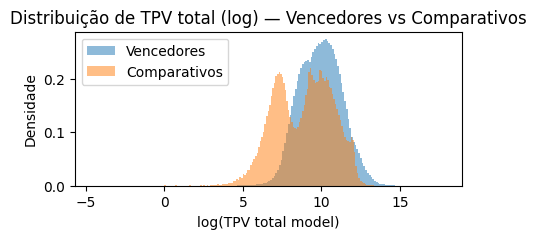

In [13]:
plt.figure(figsize=(5,2))

plt.hist(
    np.log(base_vencedores[base_vencedores['tpv_total_model'] > 0]['tpv_total_model']),
    bins=200, alpha=0.5, density=True, label='Vencedores'
)

plt.hist(
    np.log(base_comp[base_comp['tpv_total_model'] > 0]['tpv_total_model']),
    bins=200, alpha=0.5, density=True, label='Comparativos'
)

plt.xlabel('log(TPV total model)')
plt.ylabel('Densidade')
plt.title('Distribuição de TPV total (log) — Vencedores vs Comparativos')
plt.legend()
plt.show()


In [ ]:
base_rating.sort_values(by=['RootDocumentNumber','ReferenceDate'],inplace=True)

In [ ]:
base_rating = base_rating.groupby(['RootDocumentNumber']).last().reset_index()

In [ ]:
base_over30mob3_0325 = base_over30mob3[base_over30mob3['ReferenceDate'].dt.date == datetime.date(2025,6,1)]

In [ ]:
base_vencedores_doc = base_vencedores[['RootDocumentNumber','tpv_model_inicio']].drop_duplicates()
base_vencedores_ = base_vencedores_doc.merge(base_rating,how='left',on=['RootDocumentNumber'])
base_vencedores__ = base_vencedores_.merge(base_over30mob3_0325,how='left',on=['RootDocumentNumber'])
base_vencedores__ = base_vencedores__.merge(base_rosa_ventos[['GrupoKGiro','RootDocumentNumber']],how='left',on=['RootDocumentNumber'])

In [ ]:
base_comp_doc = base_comp[['RootDocumentNumber','tpv_model_inicio']].drop_duplicates()
base_comp_ = base_comp_doc.merge(base_rating,how='left',on=['RootDocumentNumber'])
base_comp__ = base_comp_.merge(base_over30mob3_0325,how='left',on=['RootDocumentNumber'])
base_comp__ = base_comp__.merge(base_rosa_ventos[['GrupoKGiro','RootDocumentNumber']],how='left',on=['RootDocumentNumber'])

In [ ]:
conditions_tpv_vencedores = [(base_vencedores__['tpv_model_inicio'] <= 15000,'Primeiro'),((base_vencedores__['tpv_model_inicio'] > 15000)&(base_vencedores__['tpv_model_inicio'] < 100000),'Segundo'),(base_vencedores__['tpv_model_inicio'] >= 100000,'Terceiro')]
base_vencedores__['class_tpv'] = base_vencedores__['tpv_model_inicio'].case_when(conditions_tpv_vencedores)

conditions_tpv_comp = [(base_comp__['tpv_model_inicio'] <= 15000,'Primeiro'),((base_comp__['tpv_model_inicio'] > 15000)&(base_comp__['tpv_model_inicio'] < 100000),'Segundo'),(base_comp__['tpv_model_inicio'] >= 100000,'Terceiro')]
base_comp__['class_tpv'] = base_comp__['tpv_model_inicio'].case_when(conditions_tpv_comp)

In [ ]:
s = pd.to_numeric(base_vencedores__['CreditRating_I'], errors='coerce')
t = pd.to_numeric(base_comp__['CreditRating_I'], errors='coerce')

# Define as faixas, incluindo o zero
bins = [-0.00001, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

base_vencedores__['CreditRating_Grupo'] = pd.cut(s, bins=bins, labels=labels, right=True).astype('Int64')
base_comp__['CreditRating_Grupo'] = pd.cut(t, bins=bins, labels=labels, right=True).astype('Int64')

base_vencedores__agg = base_vencedores__.groupby(['CreditRating_Grupo','class_tpv']).agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_vencedores__agg['pct_O30M3_vencedores'] = (base_vencedores__agg['isover30']/base_vencedores__agg['total_doc'])*100

base_comp__agg = base_comp__.groupby(['CreditRating_Grupo','class_tpv']).agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_comp__agg['pct_O30M3_perdedores'] = (base_comp__agg['isover30']/base_comp__agg['total_doc'])*100

In [ ]:
base_vencedores__agg = base_vencedores__.groupby(['CreditRating_Grupo','class_tpv']).agg(
                                              isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))

# 2. Distribuição das contagens de 'GrupoKGiro' por grupo
distribuicao_contagens = base_vencedores__.groupby(['CreditRating_Grupo', 'class_tpv', 'GrupoKGiro'])['RootDocumentNumber'].count().unstack(fill_value=0)

base_vencedores__agg = base_vencedores__agg.join(distribuicao_contagens)

colunas_distribuicao = distribuicao_contagens.columns
# Cálculo do percentual
for col in colunas_distribuicao:
    percentual = (base_vencedores__agg[col] / base_vencedores__agg['total_doc']) * 100

    percentual_arredondado = percentual.round(2)

    base_vencedores__agg[f'{col}_Perc'] = percentual_arredondado.apply(lambda x: f'{x:.1f}')

base_vencedores__agg = base_vencedores__agg.drop(columns=colunas_distribuicao)

base_vencedores__agg['pct_O30M3_vencedores'] = ((base_vencedores__agg['isover30']/base_vencedores__agg['total_doc'])*100).round(2).astype(float)

In [ ]:
base_comp__agg = base_comp__.groupby(['CreditRating_Grupo','class_tpv']).agg(
                                              isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))

# 2. Distribuição das contagens de 'GrupoKGiro' por grupo
distribuicao_contagens = base_comp__.groupby(['CreditRating_Grupo', 'class_tpv', 'GrupoKGiro'])['RootDocumentNumber'].count().unstack(fill_value=0)

base_comp__agg = base_comp__agg.join(distribuicao_contagens)

colunas_distribuicao = distribuicao_contagens.columns
# Cálculo do percentual
for col in colunas_distribuicao:
    percentual = (base_comp__agg[col] / base_comp__agg['total_doc']) * 100

    percentual_arredondado = percentual.round(2)

    base_comp__agg[f'{col}_Perc'] = percentual_arredondado.apply(lambda x: f'{x:.1f}')

base_comp__agg = base_comp__agg.drop(columns=colunas_distribuicao)

base_comp__agg['pct_O30M3_perdedores'] = ((base_comp__agg['isover30']/base_comp__agg['total_doc'])*100).round(2).astype(float)

In [ ]:
base_vencedores__agg_ = base_vencedores__agg.merge(base_comp__agg,left_index=True,right_index=True,suffixes=('_vencedores','_perdedores')).reset_index()


In [ ]:
base_vencedores__agg_.groupby(['CreditRating_Grupo']).agg(soma_docs_vencedores = ('total_doc_vencedores','sum'),
                                                         soma_docs_perdedores = ('total_doc_perdedores','sum'))

In [ ]:
base_vencedores__agg_ = base_vencedores__agg_[['CreditRating_Grupo', 'class_tpv','isover30_vencedores', 'total_doc_vencedores',
       'Grupo A_Perc_vencedores', 'Grupo B_Perc_vencedores',
       'Grupo C_Perc_vencedores', 'Grupo D_Perc_vencedores',
       'pct_O30M3_vencedores',
       'isover30_perdedores', 'total_doc_perdedores',
       'Grupo A_Perc_perdedores', 'Grupo B_Perc_perdedores',
       'Grupo C_Perc_perdedores', 'Grupo D_Perc_perdedores',
       'pct_O30M3_perdedores']]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparação (Assumindo que base_vencedores__agg_ é seu DataFrame)
df_plot = base_vencedores__agg_[base_vencedores__agg_['class_tpv'] == 'Terceiro'].reset_index().copy()

# 2. Converte as colunas de percentual (strings 'XX.XX%') para float
# Você pode usar a mesma função de limpeza que definimos anteriormente:
def clean_pct(df, col_name):
    df[col_name] = df[col_name].astype(str).str.replace('%', '', regex=False).astype(float)
    return df

pct_cols_venc = [col for col in df_plot.columns if '_Perc_vencedores' in col]
pct_cols_perd = [col for col in df_plot.columns if '_Perc_perdedores' in col]
all_pct_cols = pct_cols_venc + pct_cols_perd

for col in all_pct_cols:
    df_plot = clean_pct(df_plot, col)

# 3. Empilha (Melt) as colunas de percentual de Vencedores e Perdedores
id_vars = ['CreditRating_Grupo', 'class_tpv']
df_long = df_plot.melt(
    id_vars=id_vars,
    value_vars=all_pct_cols,
    var_name='Métrica_Completa',
    value_name='Percentual'
)

# 4. Separa a 'Métrica_Completa' nas colunas 'Grupo' e 'Tipo'
# Ex: 'Grupo A_Perc_vencedores' -> Grupo: 'Grupo A', Tipo: 'Vencedores'
df_long[['Grupo', 'Tipo']] = df_long['Métrica_Completa'].str.split('_Perc_', expand=True)
df_long['Tipo'] = df_long['Tipo'].str.capitalize() # 'Vencedores' ou 'Perdedores'

In [ ]:
# 5. Criação do Facet Wrap (4 gráficos: Grupo A, B, C, D)
g = sns.catplot(
    data=df_long,
    x='CreditRating_Grupo',      # Colunas no Eixo X
    y='Percentual',
    hue='Tipo',                  # Vencedores vs Perdedores
    col='Grupo',                 # Facet Wrap: Cria um gráfico para cada Grupo (A, B, C, D)
    kind='bar',                  # Tipo de gráfico de barras
    col_wrap=2,                  # Coloca 2 gráficos por linha para melhor visualização
     palette={'Perdedores': '#00b466', 'Vencedores': '#ffaaaa'},
    height=4, aspect=1.2,        # Tamanho de cada subgráfico
    errorbar=None
)

# 6. Configuração e Rótulos
g.fig.suptitle('Distribuição Percentual de Vencedores vs. Perdedores por Grupo de Giro', y=1.02)

# Adiciona o 'class_tpv' à legenda principal, ou usa a segmentação no eixo X
# Aqui vamos usar a combinação CreditRating + class_tpv no X para clareza
x_labels = df_long.apply(lambda row: f"{row['CreditRating_Grupo']} ({row['class_tpv']})", axis=1).unique()

for ax in g.axes.flat:
    # Ajusta o limite do Eixo Y (se o % raramente passa de 40%, usaremos 45%)
    ax.set_ylim(0, 25)
    
    # Define o label do eixo X de forma mais detalhada se for o caso
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_xlabel('Credit Rating')
    ax.set_ylabel('Percentual (%)')

g.tight_layout()
plt.show()

In [ ]:
# Copia a base original
df = base_vencedores__agg_[base_vencedores__agg_['class_tpv'] == 'Terceiro'].copy()

# 1️⃣ Calcula o p-valor do teste de duas proporções
def pval_duas_proporcoes(row):
    count = [row['isover30_vencedores'], row['isover30_perdedores']]
    nobs = [row['total_doc_vencedores'], row['total_doc_perdedores']]
    stat, pval = proportions_ztest(count, nobs, alternative='smaller')
    return pval

df['pval_diff'] = df.apply(pval_duas_proporcoes, axis=1)

# 2️⃣ Função de estilo: vermelho + negrito no maior valor e amarelo no p-valor ≤ 0.1
def highlight_all(row):
    estilos = ['', '', '']  # para as 3 colunas: vencedores, perdedores, p-valor
    
    # regra 1: maior valor em vermelho e negrito
    if row['pct_O30M3_vencedores'] > row['pct_O30M3_perdedores']:
        estilos[0] = 'background-color: red; font-weight: bold'
    elif row['pct_O30M3_vencedores'] < row['pct_O30M3_perdedores']:
        estilos[1] = 'background-color: red; font-weight: bold'
    
    # regra 2: p-valor <= 0.1 → amarelo
    if row['pval_diff'] <= 0.1:
        estilos[2] = 'background-color: yellow; font-weight: bold'
    
    return estilos

# 3️⃣ Aplica o estilo e formata o p-valor
styled_df = df.style.apply(
    highlight_all,
    subset=['pct_O30M3_vencedores', 'pct_O30M3_perdedores', 'pval_diff'],
    axis=1
).format({'pval_diff': '{:.4f}'})

styled_df


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configurações e Cores ---
cores_vencedores = '#4daf4a' # Verde
cores_perdedores = '#e41a1c' # Vermelho
cor_pct_venc = '#377eb8' # Azul Linha Vencedores
cor_pct_perd = '#ff7f00' # Laranja Linha Perdedores

# Obtém os portes únicos para iterar
portes_unicos = df_long['class_tpv'].unique()

# --- LOOP PARA GERAR UM GRÁFICO POR PORTE (Foco no GRUPO A) ---

for porte in portes_unicos:
    # 1. FILTRAGEM DUPLA: Pelo Porte (class_tpv) E pelo Grupo de Giro ('Grupo A')
    
    # 1a. Filtro para as Barras (Distribuição) - APENAS Grupo A
    df_barras = df_long[
        (df_long['class_tpv'] == porte) & 
        (df_long['Grupo'] == 'Grupo A') 
    ].copy()
    
    # 1b. Filtro para a Linha (pct_O30M3) 
    df_pct_o30m3_filtrado = df_pct_o30m3_long[df_pct_o30m3_long['class_tpv'] == porte].copy()
    
    # --- Verificação de Dados (Importante) ---
    if df_barras.empty:
        print(f"Dados insuficientes do Grupo A para o Porte: {porte}. Pulando o gráfico.")
        continue
    
    # 2. Configura a figura e os eixos
    sns.set_style("whitegrid")
    # AQUI ESTÁ O AJUSTE DE TAMANHO: de (10, 6) para (8, 5)
    fig, ax1 = plt.subplots(figsize=(8, 5)) 

    # 3. Gráfico de Barras (Eixo Primário)
    sns.barplot(
        data=df_barras,
        x='CreditRating_Grupo',
        y='Percentual',
        hue='Tipo',
        ax=ax1,
        palette={'Vencedores': cores_vencedores, 'Perdedores': cores_perdedores},
        errorbar=None
    )

    # 4. Rótulos e Limites do Eixo Primário
    ax1.set_title(f'Distribuição do GRUPO A e Pct O30M3 - Porte: {porte}', fontsize=14) # Diminuído um pouco o título
    ax1.set_ylabel('Percentual do GRUPO A (%)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(0, 100)
    ax1.set_xlabel('CreditRating_Grupo', fontsize=11) # Diminuído um pouco o label

    # 5. Eixo Secundário (Linha para pct_O30M3_)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Pct O30M3 (%)', fontsize=11, color='gray') # Diminuído um pouco o label
    ax2.tick_params(axis='y', labelcolor='gray')

    # Obtém as posições X do eixo para alinhar a linha no centro
    x_ticks = ax1.get_xticks()

    # Plota Vencedores (pct_O30M3_vencedores)
    venc_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('vencedores')]
    ax2.plot(x_ticks, venc_data['pct_O30M3'],
             marker='o', linestyle='-', color=cor_pct_venc, label='Pct O30M3 Vencedores', linewidth=2, markersize=5) # markersize reduzido

    # Plota Perdedores (pct_O30M3_perdedores)
    perd_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('perdedores')]
    ax2.plot(x_ticks, perd_data['pct_O30M3'],
             marker='s', linestyle='--', color=cor_pct_perd, label='Pct O30M3 Perdedores', linewidth=2, markersize=5) # markersize reduzido

    # Adiciona legendas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=8, frameon=True) # Fonte da legenda reduzida

    plt.tight_layout()
    plt.show()
    print(f"\n--- Fim do Gráfico para o Porte: {porte} (Foco no Grupo A) ---\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configurações e Cores ---
cores_vencedores = '#4daf4a' # Verde
cores_perdedores = '#e41a1c' # Vermelho
cor_pct_venc = '#377eb8' # Azul Linha Vencedores
cor_pct_perd = '#ff7f00' # Laranja Linha Perdedores

# Obtém os portes únicos para iterar
portes_unicos = df_long['class_tpv'].unique()

# --- LOOP PARA GERAR UM GRÁFICO POR PORTE (Foco no GRUPO A) ---

for porte in portes_unicos:
    # 1. FILTRAGEM DUPLA: Pelo Porte (class_tpv) E pelo Grupo de Giro ('Grupo A')
    
    # 1a. Filtro para as Barras (Distribuição) - APENAS Grupo A
    df_barras = df_long[
        (df_long['class_tpv'] == porte) & 
        (df_long['Grupo'] == 'Grupo B') 
    ].copy()
    
    # 1b. Filtro para a Linha (pct_O30M3) 
    df_pct_o30m3_filtrado = df_pct_o30m3_long[df_pct_o30m3_long['class_tpv'] == porte].copy()
    
    # --- Verificação de Dados (Importante) ---
    if df_barras.empty:
        print(f"Dados insuficientes do Grupo B para o Porte: {porte}. Pulando o gráfico.")
        continue
    
    # 2. Configura a figura e os eixos
    sns.set_style("whitegrid")
    # AQUI ESTÁ O AJUSTE DE TAMANHO: de (10, 6) para (8, 5)
    fig, ax1 = plt.subplots(figsize=(8, 5)) 

    # 3. Gráfico de Barras (Eixo Primário)
    sns.barplot(
        data=df_barras,
        x='CreditRating_Grupo',
        y='Percentual',
        hue='Tipo',
        ax=ax1,
        palette={'Vencedores': cores_vencedores, 'Perdedores': cores_perdedores},
        errorbar=None
    )

    # 4. Rótulos e Limites do Eixo Primário
    ax1.set_title(f'Distribuição do GRUPO B e Pct O30M3 - Porte: {porte}', fontsize=14) # Diminuído um pouco o título
    ax1.set_ylabel('Percentual do GRUPO B (%)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(0, 20)
    ax1.set_xlabel('CreditRating_Grupo', fontsize=11) # Diminuído um pouco o label

    # 5. Eixo Secundário (Linha para pct_O30M3_)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Pct O30M3 (%)', fontsize=11, color='gray') # Diminuído um pouco o label
    ax2.tick_params(axis='y', labelcolor='gray')

    # Obtém as posições X do eixo para alinhar a linha no centro
    x_ticks = ax1.get_xticks()

    # Plota Vencedores (pct_O30M3_vencedores)
    venc_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('vencedores')]
    ax2.plot(x_ticks, venc_data['pct_O30M3'],
             marker='o', linestyle='-', color=cor_pct_venc, label='Pct O30M3 Vencedores', linewidth=2, markersize=5) # markersize reduzido

    # Plota Perdedores (pct_O30M3_perdedores)
    perd_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('perdedores')]
    ax2.plot(x_ticks, perd_data['pct_O30M3'],
             marker='s', linestyle='--', color=cor_pct_perd, label='Pct O30M3 Perdedores', linewidth=2, markersize=5) # markersize reduzido

    # Adiciona legendas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=8, frameon=True) # Fonte da legenda reduzida

    plt.tight_layout()
    plt.show()
    print(f"\n--- Fim do Gráfico para o Porte: {porte} (Foco no Grupo A) ---\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configurações e Cores ---
cores_vencedores = '#4daf4a' # Verde
cores_perdedores = '#e41a1c' # Vermelho
cor_pct_venc = '#377eb8' # Azul Linha Vencedores
cor_pct_perd = '#ff7f00' # Laranja Linha Perdedores

# Obtém os portes únicos para iterar
portes_unicos = df_long['class_tpv'].unique()

# --- LOOP PARA GERAR UM GRÁFICO POR PORTE (Foco no GRUPO A) ---

for porte in portes_unicos:
    # 1. FILTRAGEM DUPLA: Pelo Porte (class_tpv) E pelo Grupo de Giro ('Grupo A')
    
    # 1a. Filtro para as Barras (Distribuição) - APENAS Grupo A
    df_barras = df_long[
        (df_long['class_tpv'] == porte) & 
        (df_long['Grupo'] == 'Grupo C') 
    ].copy()
    
    # 1b. Filtro para a Linha (pct_O30M3) 
    df_pct_o30m3_filtrado = df_pct_o30m3_long[df_pct_o30m3_long['class_tpv'] == porte].copy()
    
    # --- Verificação de Dados (Importante) ---
    if df_barras.empty:
        print(f"Dados insuficientes do Grupo C para o Porte: {porte}. Pulando o gráfico.")
        continue
    
    # 2. Configura a figura e os eixos
    sns.set_style("whitegrid")
    # AQUI ESTÁ O AJUSTE DE TAMANHO: de (10, 6) para (8, 5)
    fig, ax1 = plt.subplots(figsize=(8, 5)) 

    # 3. Gráfico de Barras (Eixo Primário)
    sns.barplot(
        data=df_barras,
        x='CreditRating_Grupo',
        y='Percentual',
        hue='Tipo',
        ax=ax1,
        palette={'Vencedores': cores_vencedores, 'Perdedores': cores_perdedores},
        errorbar=None
    )

    # 4. Rótulos e Limites do Eixo Primário
    ax1.set_title(f'Distribuição do GRUPO C e Pct O30M3 - Porte: {porte}', fontsize=14) # Diminuído um pouco o título
    ax1.set_ylabel('Percentual do GRUPO C (%)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(0, 40)
    ax1.set_xlabel('CreditRating_Grupo', fontsize=11) # Diminuído um pouco o label

    # 5. Eixo Secundário (Linha para pct_O30M3_)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Pct O30M3 (%)', fontsize=11, color='gray') # Diminuído um pouco o label
    ax2.tick_params(axis='y', labelcolor='gray')

    # Obtém as posições X do eixo para alinhar a linha no centro
    x_ticks = ax1.get_xticks()

    # Plota Vencedores (pct_O30M3_vencedores)
    venc_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('vencedores')]
    ax2.plot(x_ticks, venc_data['pct_O30M3'],
             marker='o', linestyle='-', color=cor_pct_venc, label='Pct O30M3 Vencedores', linewidth=2, markersize=5) # markersize reduzido

    # Plota Perdedores (pct_O30M3_perdedores)
    perd_data = df_pct_o30m3_filtrado[df_pct_o30m3_filtrado['Tipo_O30M3'].str.contains('perdedores')]
    ax2.plot(x_ticks, perd_data['pct_O30M3'],
             marker='s', linestyle='--', color=cor_pct_perd, label='Pct O30M3 Perdedores', linewidth=2, markersize=5) # markersize reduzido

    # Adiciona legendas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=8, frameon=True) # Fonte da legenda reduzida

    plt.tight_layout()
    plt.show()
    print(f"\n--- Fim do Gráfico para o Porte: {porte} (Foco no Grupo C) ---\n")

In [ ]:
base_rosa_ventos_w = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(base_vencedores['RootDocumentNumber'].unique().tolist())]
base_rosa_ventos_l = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(base_comp['RootDocumentNumber'].unique().tolist())]

base_rosa_ventos_w_ativos_30d = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(base_vencedores_ativos_30d['RootDocumentNumber'].unique().tolist())]
base_rosa_ventos_l_ativos_30d = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(base_comp_ativos_30d['RootDocumentNumber'].unique().tolist())]

In [ ]:
base_rosa_ventos_w[base_rosa_ventos_w['GrupoKGiro'].isin(['Grupo A','Grupo B','Grupo C','Grupo D'])]['documento'].nunique()

In [ ]:
base_rosa_ventos_w['GrupoKGiro'].value_counts(normalize=True)*100

In [ ]:
base_rosa_ventos_w_ativos_30d[base_rosa_ventos_w_ativos_30d['GrupoKGiro'].isin(['Grupo A','Grupo B','Grupo C','Grupo D'])]['documento'].nunique()

In [ ]:
base_rosa_ventos_w_ativos_30d['GrupoKGiro'].value_counts(normalize=True)*100

In [ ]:
# Calcular porcentagens de cada grupo
df_padrao = base_rosa_ventos['GrupoKGiro'].value_counts(normalize=True) * 100
df_vencedores = base_rosa_ventos_w['GrupoKGiro'].value_counts(normalize=True) * 100
df_perdedores = base_rosa_ventos_l['GrupoKGiro'].value_counts(normalize=True) * 100

# Combinar em um único DataFrame
df_plot = pd.DataFrame({
    'Padrão': df_padrao,
    'Vencedores': df_vencedores,
    'Perdedores': df_perdedores
}).fillna(0)  # Substitui categorias ausentes por 0

# Ordena categorias (opcional, se quiser manter ordem fixa)
df_plot = df_plot.sort_index()

# Plotagem
df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Distribuição percentual por GrupoKGiro (10/2025)')
plt.ylabel('%')
plt.xlabel('GrupoKGiro')
plt.legend(title='Base')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Rosa dos Ventos - Ativos

# Calcular porcentagens de cada grupo
df_padrao = base_rosa_ventos['GrupoKGiro'].value_counts(normalize=True) * 100
df_vencedores = base_rosa_ventos_w_ativos_30d['GrupoKGiro'].value_counts(normalize=True) * 100
df_perdedores = base_rosa_ventos_l_ativos_30d['GrupoKGiro'].value_counts(normalize=True) * 100

# Combinar em um único DataFrame
df_plot = pd.DataFrame({
    'Padrão': df_padrao,
    'Vencedores': df_vencedores,
    'Perdedores': df_perdedores
}).fillna(0)  # Substitui categorias ausentes por 0

# Ordena categorias (opcional, se quiser manter ordem fixa)
df_plot = df_plot.sort_index()

# Plotagem
df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Distribuição percentual por GrupoKGiro (Ativos - 10/2025)')
plt.ylabel('%')
plt.xlabel('GrupoKGiro (Ativos)')
plt.legend(title='Base')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Motivos de inegibilidade

# --- Parâmetros ---
TOP_N = 15

# --- 1) Filtra a base ---
docs_win_30d = base_vencedores['RootDocumentNumber'].unique().tolist()

sub = base_elegibilidade_res.loc[
    base_elegibilidade_res['RootDocumentNumber'].isin(docs_win_30d),
    ['RootDocumentNumber', 'reasons_not_elegible_translation']
].copy()

# --- 2) Remove motivos vazios ou nulos ---
sub = sub[sub['reasons_not_elegible_translation'].notna()]
sub = sub[sub['reasons_not_elegible_translation'].str.strip() != '']

# --- 3) Top N motivos ---
motivos_abs = sub['reasons_not_elegible_translation'].value_counts()
top_motivos = motivos_abs.head(TOP_N).index

# --- 4) Percentual refeito com base apenas nos válidos ---
total_validos = motivos_abs.sum()
motivos_pct = (motivos_abs / total_validos * 100).loc[top_motivos]

# --- 5) Tabela base ---
tabela = pd.DataFrame({
    'Motivo': top_motivos,
    'Quantidade': motivos_abs.loc[top_motivos].astype('int64'),
    'Percentual': motivos_pct.astype('float')
}).reset_index(drop=True)

display(tabela.style.format({'Percentual': '{:.2f}%'}))

# ==========================
# 6) Heatmap
# ==========================

data_plot = tabela[['Motivo', 'Percentual']].set_index('Motivo')
data_plot['Percentual'] = pd.to_numeric(data_plot['Percentual'], errors='coerce').fillna(0.0)

labels = data_plot['Percentual'].map(lambda x: f"{x:.2f}%").to_numpy().reshape(-1, 1)

plt.figure(figsize=(6.5, max(6, TOP_N * 0.45)))
sns.heatmap(
    data_plot.astype(float),
    annot=labels,
    fmt="",
    cmap='YlOrRd',
    cbar=False,
    yticklabels=data_plot.index,
    annot_kws={"size": 7},
)

plt.title('', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()


In [ ]:
#Análise de rating
base_rating[base_rating['RootDocumentNumber'].isin(base_vencedores['RootDocumentNumber'].unique().tolist())]['CreditRating_I'].value_counts(normalize=True)*100

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from pathlib import Path

# ---------- Registrar Manrope local ----------
def register_manrope_fonts():
    regular_path = Path("Manrope-Regular.ttf")
    bold_path = Path("Manrope-Bold.ttf")
    if not regular_path.exists() or not bold_path.exists():
        raise FileNotFoundError(
            "Arquivos da fonte Manrope não encontrados em 'projeto_vencedores/'."
        )
    fm.fontManager.addfont(str(regular_path))
    fm.fontManager.addfont(str(bold_path))
    plt.rcParams["font.family"] = "Manrope"
    plt.rcParams["font.weight"] = "regular"

# ---------- Função auxiliar ----------
def _pct_por_faixa(series_notas: pd.Series) -> pd.Series:
    s = pd.to_numeric(series_notas, errors="coerce")
    denom = s.notna().sum()
    if denom == 0:
        return pd.Series(
            [0, 0, 0, 0, 0],
            index=["Sem Rating", "(0, 2.5]", "(2.5, 5]", "(5, 7.5]", "(7.5, 10]"],
            dtype=float,
        )

    zeros = (s == 0).sum()
    s_pos = s[(s > 0) & s.notna()]

    bins = [0, 2.5, 5, 7.5, 10]
    labels = ["(0, 2.5]", "(2.5, 5]", "(5, 7.5]", "(7.5, 10]"]
    cats = pd.cut(s_pos, bins=bins, right=True, include_lowest=False, labels=labels)

    pct_bins = (cats.value_counts(sort=False).reindex(labels, fill_value=0) / denom) * 100
    pct = pd.Series(index=["Sem Rating"] + labels, dtype=float)
    pct["Sem Rating"] = (zeros / denom) * 100
    for lab in labels:
        pct[lab] = pct_bins[lab]
    return pct

# ---------- Gráfico comparativo ----------
def hist_rating_comparativo(base_rating, base_vencedores, base_comp):
    """
    Gráfico comparativo de % de faixas de rating:
      - Vencedores (verde)
      - Perdedores (azul acinzentado)
    Inclui 'Sem Rating' e faixas (0,2.5], (2.5,5], (5,7.5], (7.5,10].
    """
    register_manrope_fonts()

    labels_ordem = ["Sem Rating", "(0, 2.5]", "(2.5, 5]", "(5, 7.5]", "(7.5, 10]"]

    # Filtragem
    ids_venc = base_vencedores["RootDocumentNumber"].unique().tolist()
    ids_comp = base_comp["RootDocumentNumber"].unique().tolist()

    s_venc = base_rating[base_rating["RootDocumentNumber"].isin(ids_venc)]["CreditRating_I"]
    s_comp = base_rating[base_rating["RootDocumentNumber"].isin(ids_comp)]["CreditRating_I"]

    pct_venc = _pct_por_faixa(s_venc).reindex(labels_ordem)
    pct_comp = _pct_por_faixa(s_comp).reindex(labels_ordem)

    df_pct = pd.DataFrame({"Vencedores": pct_venc, "Perdedores": pct_comp})

    # ----- Plot (volta à altura anterior, alta resolução) -----
    plt.rcParams["figure.dpi"] = 180
    fig, ax = plt.subplots(figsize=(13, 3.8))  # volta à altura original

    x = np.arange(len(labels_ordem))
    width = 0.38

    color_venc = "#2dbd69"   # verde
    color_comp = "#6b8ba4"   # azul acinzentado
    edge = "#194d33"

    bars1 = ax.bar(x - width/2, df_pct["Vencedores"].values, width,
                   label="Vencedores", color=color_venc, edgecolor=edge, linewidth=1)
    bars2 = ax.bar(x + width/2, df_pct["Perdedores"].values, width,
                   label="Perdedores", color=color_comp, edgecolor="#3b4a58", linewidth=1)

    # Rótulos de % no topo
    for b in bars1:
        ax.annotate(f"{b.get_height():.1f}%",
                    (b.get_x() + b.get_width()/2, b.get_height()),
                    xytext=(0, 3), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9, fontweight="bold")
    for b in bars2:
        ax.annotate(f"{b.get_height():.1f}%",
                    (b.get_x() + b.get_width()/2, b.get_height()),
                    xytext=(0, 3), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9, fontweight="bold")

    # Estilo
    ax.set_xticks(x, labels_ordem)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")
    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.set_ylim(0, max(5, df_pct.max().max() * 1.15))

    # Reposiciona a legenda levemente acima do gráfico
    ax.legend(
        frameon=False,
        fontsize=11,
        ncol=2,
        loc="lower center",
        bbox_to_anchor=(0.5, 1.05)
    )

    plt.tight_layout()
    return fig, ax, df_pct

# ------------------ Exemplo ------------------
fig, ax, df_pct = hist_rating_comparativo(base_rating, base_vencedores, base_comp)
plt.show()


In [ ]:
#Análise de rating
base_rating[base_rating['RootDocumentNumber'].isin(base_comp['RootDocumentNumber'].unique().tolist())]['CreditRating_I'].value_counts(normalize=True)*100

In [14]:
dfs_w_q = {}
dfs_l_q = {}
dfs_w_cadastrados_q = {}
dfs_l_cadastrados_q = {}
dfs_w_ativos30d_q = {}
dfs_l_ativos30d_q = {}

for i in range(1,17):
    print(i)

    base = pd.read_csv(f'base_{i}.csv')
    base['RootDocumentNumber'] = base['document'].astype(str).str[:8].astype(int)
#    base['winner'] = np.where(base['fe_document'] >= 6.0596605274871,1,0)

    dfs_w_q[f'base_w_q{i}'] = base[base['winner'] == 1]
    dfs_l_q[f'base_l_q{i}'] = base[base['winner'] == 0]
    
#    dfs_w_cadastrados_q[f'base_w_cadastrados_q{i}'] = base[(base['winner'] == 1)&((base['cadastro_stone'] == 1)|(base['cadastro_ton'] == 1))]
#    dfs_l_cadastrados_q[f'base_l_cadastrados_q{i}'] = base[(base['winner'] == 0)&((base['cadastro_stone'] == 1)|(base['cadastro_ton'] == 1))]

    dfs_w_ativos30d_q[f'base_w_ativos30d_q{i}'] = base[(base['winner'] == 1)&((base['ativo_30d_stone'] == 1)|(base['ativo_30d_ton'] == 1))]
    dfs_l_ativos30d_q[f'base_l_ativos30d_q{i}'] = base[(base['winner'] == 0)&((base['ativo_30d_stone'] == 1)|(base['ativo_30d_ton'] == 1))]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [15]:
def funcao_tomado_kgiro(df_documentos,df_kgiro):
    ls_document = df_documentos['RootDocumentNumber'].unique().tolist()
    df_kgiro_loc = df_kgiro[df_kgiro['RootDocumentNumber'].isin(ls_document)]
    df_kgiro_loc = df_kgiro_loc.sort_values(by=['RootDocumentNumber', 'ReferenceMonth'])
    df_kgiro_loc['var_pct_valorTomadoKGiro'] = (
    df_kgiro_loc
    .groupby('RootDocumentNumber')['valorTomadoKGiro']
    .pct_change())
    df_kgiro_loc['diff_valorTomadoKGiro'] = (
    df_kgiro_loc
    .groupby('RootDocumentNumber')['valorTomadoKGiro']
    .diff())
    df_kgiro_loc['check_var_pct_valorTomadoKGiro'] = np.where(
    (df_kgiro_loc['var_pct_valorTomadoKGiro'] > 0.1) &
    (df_kgiro_loc['valorTomadoKGiro'] <= 50000000) &
    (df_kgiro_loc['diff_valorTomadoKGiro'] <= 5000000) &
    (~np.isinf(df_kgiro_loc['var_pct_valorTomadoKGiro']) &
    (df_kgiro_loc['var_pct_valorTomadoKGiro'].notna())),
    1, 0)
    
    return df_kgiro_loc




In [ ]:
query_elegibilidade_back = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.elegibilidade_estudo_vencedores_backtest`"""
df_elegibilidade_back = bf.read_gbq(query_elegibilidade_back)
base_elegibilidade_back = df_elegibilidade_back.to_pandas()

base_elegibilidade_back.sort_values(by=['document','data_application_score_processing_at'],inplace=True)
base_elegibilidade_res_back = base_elegibilidade_back.groupby(['document']).last().reset_index()
base_elegibilidade_res_back['RootDocumentNumber'] = base_elegibilidade_res_back['document'].str[:8].astype(int)


In [ ]:
docs_win_30d = base_vencedores_ativos_30d['RootDocumentNumber'].unique().tolist()
base_elegibilidade_res_ativos_30d = base_elegibilidade_res_back.loc[
    base_elegibilidade_res['RootDocumentNumber'].isin(docs_win_30d),
    ['RootDocumentNumber', 'reasons_not_elegible_translation']].copy()

base_tomado_kgiro_ = base_tomado_kgiro[base_tomado_kgiro['RootDocumentNumber'].isin(docs_win_30d)]
base_tomado_kgiro_ = base_tomado_kgiro_.sort_values(by=['RootDocumentNumber', 'ReferenceMonth'])
base_tomado_kgiro_['var_pct_valorTomadoKGiro'] = (
base_tomado_kgiro_
.groupby('RootDocumentNumber')['valorTomadoKGiro']
.pct_change())
base_tomado_kgiro_['diff_valorTomadoKGiro'] = (
base_tomado_kgiro_
.groupby('RootDocumentNumber')['valorTomadoKGiro']
.diff())
base_tomado_kgiro_['check_var_pct_valorTomadoKGiro'] = np.where(
(base_tomado_kgiro_['var_pct_valorTomadoKGiro'] > 0.1) &
(~np.isinf(base_tomado_kgiro_['var_pct_valorTomadoKGiro']) &
(base_tomado_kgiro_['var_pct_valorTomadoKGiro'].notna())),
1, 0)

base_eligibilidade_scr = pd.merge(base_tomado_kgiro_,base_elegibilidade_res_ativos_30d,how='left',on=['RootDocumentNumber'])
base_eligibilidade_scr_6m = base_eligibilidade_scr[base_eligibilidade_scr['ReferenceMonth'].dt.date >= datetime.date(2025,3,1)]

In [ ]:
base_eligibilidade_scr_6m_razoes = base_eligibilidade_scr_6m[base_eligibilidade_scr_6m['reasons_not_elegible_translation'].isin(['| SEM RATING || LIMITE |','| QUEDA TPV |','| SCR ALAVANCAGEM || DISPONIBILIDADE || LIMITE |','| SCR ALAVANCAGEM || DISPONIBILIDADE |'])]
base_eligibilidade_scr_6m_razoes[base_eligibilidade_scr_6m_razoes['check_var_pct_valorTomadoKGiro'] == 1]['diff_valorTomadoKGiro'].sum()

In [16]:
base_w_kgiro = funcao_tomado_kgiro(base_vencedores,base_tomado_kgiro)
base_w_ativos_30d_kgiro = funcao_tomado_kgiro(base_vencedores_ativos_30d,base_tomado_kgiro)

base_l_kgiro = funcao_tomado_kgiro(base_comp,base_tomado_kgiro)
base_l_ativos_30d_kgiro = funcao_tomado_kgiro(base_comp_ativos_30d,base_tomado_kgiro)

In [ ]:
base_w_kgiro = funcao_tomado_kgiro(base_vencedores,base_tomado_kgiro)
base_w_cadastrados_kgiro = funcao_tomado_kgiro(base_vencedores_cadastrados,base_tomado_kgiro)
base_w_ativos_30d_kgiro = funcao_tomado_kgiro(base_vencedores_ativos_30d,base_tomado_kgiro)

base_l_kgiro = funcao_tomado_kgiro(base_comp,base_tomado_kgiro)
base_l_cadastrados_kgiro = funcao_tomado_kgiro(base_comp_cadastrados,base_tomado_kgiro)
base_l_ativos_30d_kgiro = funcao_tomado_kgiro(base_comp_ativos_30d,base_tomado_kgiro)

In [17]:
for i in range(1,17):
    print(f"Grupo {i}")
    base_w_q_kgiro = funcao_tomado_kgiro(dfs_w_q[f'base_w_q{i}'],base_tomado_kgiro)
#    base_w_q_cadastrados_kgiro = funcao_tomado_kgiro(dfs_w_cadastrados_q[f'base_w_cadastrados_q{i}'],base_tomado_kgiro)
    base_w_q_ativos_30d_kgiro = funcao_tomado_kgiro(dfs_w_ativos30d_q[f'base_w_ativos30d_q{i}'],base_tomado_kgiro)

    base_l_q_kgiro = funcao_tomado_kgiro(dfs_l_q[f'base_l_q{i}'],base_tomado_kgiro)
#    base_l_q_cadastrados_kgiro = funcao_tomado_kgiro(dfs_l_cadastrados_q[f'base_l_cadastrados_q{i}'],base_tomado_kgiro)
    base_l_q_ativos_30d_kgiro = funcao_tomado_kgiro(dfs_l_ativos30d_q[f'base_l_ativos30d_q{i}'],base_tomado_kgiro)
    
    base_over30mob3_w = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_w_q_kgiro['RootDocumentNumber'].unique().tolist())]
    base_over30mob3_w_agg = base_over30mob3_w.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                                  total_doc = ('RootDocumentNumber','count'))
    base_over30mob3_w_agg['pct_over30mob3'] = (base_over30mob3_w_agg['isover30']/base_over30mob3_w_agg['total_doc'])*100

    base_over30mob3_l = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_l_q_kgiro['RootDocumentNumber'].unique().tolist())]
    base_over30mob3_l_agg = base_over30mob3_l.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                                  total_doc = ('RootDocumentNumber','count'))
    base_over30mob3_l_agg['pct_over30mob3'] = (base_over30mob3_l_agg['isover30']/base_over30mob3_l_agg['total_doc'])*100

    
    print(f"SCR 12 meses (Total-Vencedoras) :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")
    print(f"SCR 12 meses (Total-Perdedoras) :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")

    print(f"SCR 12 meses (Média-Vencedoras) :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
    print(f"SCR 12 meses (Média-Perdedoras) :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
          
    print(f"SCR 08/25 (Total-Vencedoras) :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")
    print(f"SCR 08/25 (Total-Perdedoras) :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")

    print(f"SCR 08/25 (Média-Vencedoras) :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
    print(f"SCR 08/25 (Média-Perdedoras) :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")

    print(f"N Vencedoras :{base_w_q_kgiro['RootDocumentNumber'].nunique()}")
    print(f"N Perdedoras :{base_l_q_kgiro['RootDocumentNumber'].nunique()}")

    print(f"N Vencedoras tomaram 12M :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
    print(f"N Perdedoras tomaram 12M :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
    
    print(f"N Vencedoras tomaram 08/25 :{base_w_q_kgiro[(base_w_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
    print(f"N Perdedoras tomaram 08/25 :{base_l_q_kgiro[(base_l_q_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_q_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
    
    print(f"Vencedores Over30Mob3 12M :{base_over30mob3_w_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
    print(f"Vencedores Over30Mob3 03/25 :{base_over30mob3_w_agg.iloc[-1,:]['pct_over30mob3']}")

    print(f"Perdedores Over30Mob3 12M :{base_over30mob3_l_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
    print(f"Perdedores Over30Mob3 03/25 :{base_over30mob3_l_agg.iloc[-1,:]['pct_over30mob3']}")


Grupo 1
SCR 12 meses (Total-Vencedoras) :804898931.27
SCR 12 meses (Total-Perdedoras) :100114919.35
SCR 12 meses (Média-Vencedoras) :82275.26640805478
SCR 12 meses (Média-Perdedoras) :61837.50423100679
SCR 08/25 (Total-Vencedoras) :74202548.36
SCR 08/25 (Total-Perdedoras) :9911030.07
SCR 08/25 (Média-Vencedoras) :62830.26956816257
SCR 08/25 (Média-Perdedoras) :50825.79523076923
N Vencedoras :150601
N Perdedoras :37808
N Vencedoras tomaram 12M :9783
N Perdedoras tomaram 12M :1619
N Vencedoras tomaram 08/25 :1181
N Perdedoras tomaram 08/25 :195
Vencedores Over30Mob3 12M :3.266892482366785
Vencedores Over30Mob3 03/25 :3.283024190704563
Perdedores Over30Mob3 12M :3.649287423059963
Perdedores Over30Mob3 03/25 :3.4009388008148083
Grupo 2
SCR 12 meses (Total-Vencedoras) :676995176.0
SCR 12 meses (Total-Perdedoras) :121857467.84000002
SCR 12 meses (Média-Vencedoras) :107187.32995566814
SCR 12 meses (Média-Perdedoras) :93736.51372307693
SCR 08/25 (Total-Vencedoras) :64524139.14
SCR 08/25 (Total

In [ ]:
# Análise para os vencedores e perdedores (TODAS)

base_over30mob3_w = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_w_kgiro['RootDocumentNumber'].unique().tolist())]
base_over30mob3_w_agg = base_over30mob3_w.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_over30mob3_w_agg['pct_over30mob3'] = (base_over30mob3_w_agg['isover30']/base_over30mob3_w_agg['total_doc'])*100

base_over30mob3_l = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_l_kgiro['RootDocumentNumber'].unique().tolist())]
base_over30mob3_l_agg = base_over30mob3_l.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_over30mob3_l_agg['pct_over30mob3'] = (base_over30mob3_l_agg['isover30']/base_over30mob3_l_agg['total_doc'])*100


print(f"SCR 12 meses (Total-Vencedoras) :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")
print(f"SCR 12 meses (Total-Perdedoras) :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")

print(f"SCR 12 meses (Média-Vencedoras) :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
print(f"SCR 12 meses (Média-Perdedoras) :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")

print(f"SCR 08/25 (Total-Vencedoras) :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")
print(f"SCR 08/25 (Total-Perdedoras) :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")

print(f"SCR 08/25 (Média-Vencedoras) :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
print(f"SCR 08/25 (Média-Perdedoras) :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras :{base_w_kgiro['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras :{base_l_kgiro['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras tomaram 12M :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras tomaram 12M :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras tomaram 08/25 :{base_w_kgiro[(base_w_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras tomaram 08/25 :{base_l_kgiro[(base_l_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")

print(f"Vencedores Over30Mob3 12M :{base_over30mob3_w_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
print(f"Vencedores Over30Mob3 03/25 :{base_over30mob3_w_agg.iloc[-1,:]['pct_over30mob3']}")

print(f"Perdedores Over30Mob3 12M :{base_over30mob3_l_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
print(f"Perdedores Over30Mob3 03/25 :{base_over30mob3_l_agg.iloc[-1,:]['pct_over30mob3']}")


In [ ]:
# Análise para os vencedores e perdedores (Ativos 30D)

base_over30mob3_w = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_w_ativos_30d_kgiro['RootDocumentNumber'].unique().tolist())]
base_over30mob3_w_agg = base_over30mob3_w.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_over30mob3_w_agg['pct_over30mob3'] = (base_over30mob3_w_agg['isover30']/base_over30mob3_w_agg['total_doc'])*100

base_over30mob3_l = base_over30mob3[base_over30mob3['RootDocumentNumber'].isin(base_l_ativos_30d_kgiro['RootDocumentNumber'].unique().tolist())]
base_over30mob3_l_agg = base_over30mob3_l.groupby('ReferenceDate').agg(isover30 = ('IsOver30','sum'),
                                              total_doc = ('RootDocumentNumber','count'))
base_over30mob3_l_agg['pct_over30mob3'] = (base_over30mob3_l_agg['isover30']/base_over30mob3_l_agg['total_doc'])*100


print(f"SCR 12 meses (Total-Vencedoras Ativas) :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")
print(f"SCR 12 meses (Total-Perdedoras Ativas) :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()}")

print(f"SCR 12 meses (Média-Vencedoras Ativas) :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_w_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")
print(f"SCR 12 meses (Média-Perdedoras Ativas) :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()/base_l_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")

print(f"SCR 08/25 (Total-Vencedoras Ativas) :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")
print(f"SCR 08/25 (Total-Perdedoras Ativas) :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()}")

print(f"SCR 08/25 (Média-Vencedoras Ativas) :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_w_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")
print(f"SCR 08/25 (Média-Perdedoras Ativas) :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['diff_valorTomadoKGiro'].sum()/base_l_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras Ativas :{base_w_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras Ativas :{base_l_ativos_30d_kgiro['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras Ativas tomaram 12M :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras Ativas tomaram 12M :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)]['RootDocumentNumber'].nunique()}")

print(f"N Vencedoras Ativas tomaram 08/25 :{base_w_ativos_30d_kgiro[(base_w_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_w_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")
print(f"N Perdedoras Ativas tomaram 08/25 :{base_l_ativos_30d_kgiro[(base_l_ativos_30d_kgiro['check_var_pct_valorTomadoKGiro'] == 1)&(base_l_ativos_30d_kgiro['ReferenceMonth'].dt.date == datetime.date(2025,8,1))]['RootDocumentNumber'].nunique()}")

print(f"Vencedores Ativas Over30Mob3 12M :{base_over30mob3_w_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
print(f"Vencedores Ativas Over30Mob3 03/25 :{base_over30mob3_w_agg.iloc[-1,:]['pct_over30mob3']}")

print(f"Perdedores Ativas Over30Mob3 12M :{base_over30mob3_l_agg.iloc[-12:,:]['pct_over30mob3'].mean()}")
print(f"Perdedores Ativas Over30Mob3 03/25 :{base_over30mob3_l_agg.iloc[-1,:]['pct_over30mob3']}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1. CALCULA AS MEDIANAS ----
resultados = []

for i in range(1, 17):
    med_w = dfs_w_q[f'base_w_q{i}']['tpv_model_inicio'].median()
    med_l = dfs_l_q[f'base_l_q{i}']['tpv_model_inicio'].median()
    
    resultados.append({
        'grupo': i,
        'mediana_w': med_w,
        'mediana_l': med_l
    })

df_comp = pd.DataFrame(resultados)

# ---- 2. GERA O GRÁFICO DE LINHA ----
plt.figure(figsize=(10,6))

plt.plot(df_comp['grupo'], df_comp['mediana_w'], marker='o', label='Mediana W (dfs_w_q)')
plt.plot(df_comp['grupo'], df_comp['mediana_l'], marker='o', label='Mediana L (dfs_l_q)')

plt.title('Comparação das Medianas por Grupo (1 a 7)')
plt.xlabel('Grupo (1 a 7)')
plt.ylabel('Mediana de tpv_model_inicio')
plt.xticks(df_comp['grupo'])
plt.ylim(0,150000)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
base_vencedores['log_tpv'].median()

In [ ]:
base_comp['log_tpv'].median()

In [ ]:
np.exp(base_vencedores['log_tpv'].median())

In [ ]:
np.exp(base_comp['log_tpv'].median())

In [ ]:
'''
df_ = pd.read_csv('document_winners.csv')
df_['RootDocument'] = df_['document'].astype(str).str[:8]
df_ = df_.drop_duplicates(['RootDocument'])
df = df_[['RootDocument']]

#%% Exportacao
client = bigquery.Client(project = 'dataplatform-prd')

table_name = 'credit_negocios.document_winners'

job_config = bigquery.LoadJobConfig(write_disposition = "WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_name, job_config = job_config)
'''

In [ ]:
'''
df_ = pd.read_csv('document_losers.csv')
df_['RootDocument'] = df_['document'].astype(str).str[:8]
df_ = df_.drop_duplicates(['RootDocument'])
df = df_[['RootDocument']]

#%% Exportacao
client = bigquery.Client(project = 'dataplatform-prd')

table_name = 'credit_negocios.document_losers'

job_config = bigquery.LoadJobConfig(write_disposition = "WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_name, job_config = job_config)
'''

In [ ]:
base_w = pd.read_csv('base_w_V2.csv')
#base_l = pd.read_csv('document_losers.csv')

In [ ]:
base_w['RootDocumentNumber'] = base_w['document'].astype(str).str[:8].astype(int)
#base_l['RootDocumentNumber'] = base_l['document'].astype(str).str[:8].astype(int)

In [ ]:
ls_document_w = base_w['RootDocumentNumber'].unique().tolist()
#ls_document_l = base_l['RootDocumentNumber'].unique().tolist()

In [ ]:
base_tomado_kgiro_w = base_tomado_kgiro[base_tomado_kgiro['RootDocumentNumber'].isin(ls_document_w)]
#base_tomado_kgiro_l = base_tomado_kgiro[base_tomado_kgiro['RootDocumentNumber'].isin(ls_document_l)]

In [ ]:
base_tomado_kgiro_w = base_tomado_kgiro_w.sort_values(by=['RootDocumentNumber', 'ReferenceMonth'])
#base_tomado_kgiro_l = base_tomado_kgiro_l.sort_values(by=['RootDocumentNumber', 'ReferenceMonth'])

In [ ]:
base_tomado_kgiro_w['var_pct_valorTomadoKGiro'] = (
    base_tomado_kgiro_w
    .groupby('RootDocumentNumber')['valorTomadoKGiro']
    .pct_change())
base_tomado_kgiro_w['diff_valorTomadoKGiro'] = (
    base_tomado_kgiro_w
    .groupby('RootDocumentNumber')['valorTomadoKGiro']
    .diff())

In [ ]:
base_tomado_kgiro_w['check_var_pct_valorTomadoKGiro'] = np.where(
    (base_tomado_kgiro_w['var_pct_valorTomadoKGiro'] > 0.1) &
    (~np.isinf(base_tomado_kgiro_w['var_pct_valorTomadoKGiro']) &
    (base_tomado_kgiro_w['var_pct_valorTomadoKGiro'].notna())),
    1, 0)


In [ ]:
query_rosa_ventos = f""" SELECT * FROM `dataplatform-prd.credit_business_intelligence.vw_clientes_rosa_ventos`"""
df_rosa_ventos = bf.read_gbq(query_rosa_ventos)
base_rosa_ventos = df_rosa_ventos.to_pandas()

In [ ]:
base_rosa_ventos['RootDocumentNumber'] = base_rosa_ventos['documento'].str[:8].astype(int)

In [ ]:
base_rosa_ventos_w = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(ls_document_w)]
#base_rosa_ventos_l = base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(ls_document_l)]

In [ ]:
# Create value count percentages for both
df1 = base_rosa_ventos_w['GrupoKGiro'].value_counts(normalize=True) * 100
df2 = base_rosa_ventos['GrupoKGiro'].value_counts(normalize=True) * 100

# Combine them into one DataFrame
df_plot = pd.DataFrame({
    'Vencedores': df1,
    'Padrão': df2
}).fillna(0)  # fill missing categories with 0

# Plot grouped bars
df_plot.plot(kind='bar', figsize=(8,5))
plt.title('Distribuição percentual por GrupoKGiro (10/2025 - Winners)')
plt.ylabel('%')
plt.xlabel('GrupoKGiro')
plt.legend(title='Base')
plt.tight_layout()
plt.show()

In [ ]:
# Create value count percentages for both
df1 = base_rosa_ventos_l['GrupoKGiro'].value_counts(normalize=True) * 100
df2 = base_rosa_ventos['GrupoKGiro'].value_counts(normalize=True) * 100

# Combine them into one DataFrame
df_plot = pd.DataFrame({
    'Vencedores': df1,
    'Padrão': df2
}).fillna(0)  # fill missing categories with 0

# Plot grouped bars
df_plot.plot(kind='bar', figsize=(8,5))
plt.title('Distribuição percentual por GrupoKGiro (10/2025 - Losers)')
plt.ylabel('%')
plt.xlabel('GrupoKGiro')
plt.legend(title='Base')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular porcentagens de cada grupo
df_padrao = base_rosa_ventos['GrupoKGiro'].value_counts(normalize=True) * 100
df_vencedores = base_rosa_ventos_w['GrupoKGiro'].value_counts(normalize=True) * 100
df_perdedores = base_rosa_ventos_l['GrupoKGiro'].value_counts(normalize=True) * 100

# Combinar em um único DataFrame
df_plot = pd.DataFrame({
    'Padrão': df_padrao,
    'Vencedores': df_vencedores,
    'Perdedores': df_perdedores
}).fillna(0)  # Substitui categorias ausentes por 0

# Ordena categorias (opcional, se quiser manter ordem fixa)
df_plot = df_plot.sort_index()

# Plotagem
df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Distribuição percentual por GrupoKGiro (10/2025)')
plt.ylabel('%')
plt.xlabel('GrupoKGiro')
plt.legend(title='Base')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
base_kgiro_rosas_w = base_tomado_kgiro_w.merge(base_rosa_ventos_w,how='left',on=['RootDocumentNumber']).dropna(subset=['GrupoKGiro'])
#base_kgiro_rosas_l = base_tomado_kgiro_l.merge(base_rosa_ventos_l,how='left',on=['RootDocumentNumber']).dropna(subset=['GrupoKGiro'])

In [ ]:
base_kgiro_rosas_w[base_kgiro_rosas_w['check_var_pct_valorTomadoKGiro'] == 1]['diff_valorTomadoKGiro'].sum()

In [ ]:
base_kgiro_rosas_l[base_kgiro_rosas_l['check_var_pct_valorTomadoKGiro'] == 1]['diff_valorTomadoKGiro'].sum()

In [ ]:
(
    base_kgiro_rosas_w[base_kgiro_rosas_w['check_var_pct_valorTomadoKGiro'] == 1]
    .groupby(['GrupoKGiro'])
    .agg(valor_tomado_KGiro=('diff_valorTomadoKGiro', 'sum'))
    .assign(valor_tomado_KGiro=lambda x: x['valor_tomado_KGiro'] / 1_000_000)
    .plot(kind='bar', legend=False)
)

plt.ylabel('Valor')
plt.title('Valor Tomado (11M) por Grupo KGiro (em milhões - Winners)')
plt.show()

In [ ]:
(
    base_kgiro_rosas_l[base_kgiro_rosas_l['check_var_pct_valorTomadoKGiro'] == 1]
    .groupby(['GrupoKGiro'])
    .agg(valor_tomado_KGiro=('diff_valorTomadoKGiro', 'sum'))
    .assign(valor_tomado_KGiro=lambda x: x['valor_tomado_KGiro'] / 1_000_000)
    .plot(kind='bar', legend=False)
)

plt.ylabel('Valor')
plt.title('Valor Tomado (11M) por Grupo KGiro (em milhões - Losers)')
plt.show()

In [ ]:
# Agregações
w = (
    base_kgiro_rosas_w[base_kgiro_rosas_w['check_var_pct_valorTomadoKGiro'] == 1]
    .groupby('GrupoKGiro')['diff_valorTomadoKGiro']
    .sum()
)

l = (
    base_kgiro_rosas_l[base_kgiro_rosas_l['check_var_pct_valorTomadoKGiro'] == 1]
    .groupby('GrupoKGiro')['diff_valorTomadoKGiro']
    .sum()
)

# Combina em um único DataFrame e converte para milhões
df_valor = pd.DataFrame({
    'Vencedores': w,
    'Perdedores': l
}).fillna(0) / 1_000_000

# Ordena alfabeticamente pelo nome do grupo
df_valor = df_valor.sort_index()

# Plot
ax = df_valor.plot(kind='bar', figsize=(10,6))
ax.set_title('Valor Tomado (11M) por Grupo KGiro (em milhões) – Winners x Losers')
ax.set_ylabel('R$ milhões')
ax.set_xlabel('GrupoKGiro')
ax.legend(title='Base')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# (Opcional) Adicionar rótulos numéricos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=2)

plt.show()



In [ ]:
query_elegibilidade = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.elegibilidade_estudo_vencedores`"""
df_elegibilidade = bf.read_gbq(query_elegibilidade)
base_elegibilidade = df_elegibilidade.to_pandas()

In [ ]:
base_elegibilidade.sort_values(by=['document','data_application_score_processing_at'],inplace=True)

In [ ]:
base_elegibilidade_res = base_elegibilidade.groupby(['document']).last().reset_index()

In [ ]:
base_elegibilidade_res['RootDocumentNumber'] = base_elegibilidade_res['document'].str[:8].astype(int)

In [ ]:
base_elegibilidade_res_w = base_elegibilidade_res[base_elegibilidade_res['RootDocumentNumber'].isin(ls_document_w)]
#base_elegibilidade_res_l = base_elegibilidade_res[base_elegibilidade_res['RootDocumentNumber'].isin(ls_document_l)]

In [ ]:
TOP_N = 15
SCALE_MILLIONS = True  # opcional

# 1) Top N motivos
motivos_abs = base_elegibilidade_res_w['reasons_not_elegible_translation'].value_counts()
top_motivos = motivos_abs.head(TOP_N).index
motivos_pct = (motivos_abs / motivos_abs.sum() * 100).loc[top_motivos]

# 2) Soma de diff_valorTomadoKGiro por motivo (com filtro)
df_reason_docs = (
    base_elegibilidade_res_w.loc[
        base_elegibilidade_res_w['reasons_not_elegible_translation'].isin(top_motivos),
        ['reasons_not_elegible_translation', 'RootDocumentNumber']
    ]
    .drop_duplicates()
)

kgiro_ok = base_tomado_kgiro_w.loc[
    base_tomado_kgiro_w['check_var_pct_valorTomadoKGiro'] == 1,
    ['RootDocumentNumber', 'diff_valorTomadoKGiro']
]

val_sum = (
    df_reason_docs
    .merge(kgiro_ok, on='RootDocumentNumber', how='left')
    .groupby('reasons_not_elegible_translation', dropna=False)['diff_valorTomadoKGiro']
    .sum(min_count=1)
    .reindex(top_motivos)
    .fillna(0.0)
)

# 3) Monta a tabela base (ordem preservada)
tabela = pd.DataFrame({
    'Quantidade': motivos_abs.loc[top_motivos].astype('int64'),
    'Percentual': motivos_pct.astype('float'),
    'Valor_Soma': val_sum.astype('float')
})
tabela.index.name = 'Motivo'  # só para ficar bonito

# 4) Coluna de exibição em milhões + rename (se for usar no gráfico)
if SCALE_MILLIONS:
    tabela['Valor_Soma_exib'] = (tabela['Valor_Soma'] / 1_000_000).astype('float')
    # se quiser usar o nome final no heatmap:
    tabela = tabela.rename(columns={'Valor_Soma_exib': 'Valor KGiro'})
    valor_col_plot = 'Valor KGiro'
else:
    valor_col_plot = 'Valor_Soma'

In [ ]:
# ==========================
# 4) Heatmap-tabela: Razões x (Percentual, Soma)
# ==========================
data_plot = tabela[['Percentual', valor_col_plot]].copy()

# Garante que ambas as colunas são numéricas
for c in data_plot.columns:
    data_plot[c] = pd.to_numeric(data_plot[c], errors='coerce')

# (Opcional) se houver NaN, substitui por 0 para o heatmap
data_plot = data_plot.fillna(0.0)

# Labels personalizados por coluna (strings apenas para anotação)
labels = pd.DataFrame(index=data_plot.index, columns=data_plot.columns)
labels['Percentual'] = data_plot['Percentual'].map(lambda x: f"{x:.2f}%")

if SCALE_MILLIONS:
    labels[valor_col_plot] = data_plot[valor_col_plot].map(lambda x: f"{x:.2f} Mi")
else:
    labels[valor_col_plot] = data_plot[valor_col_plot].map(
        lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
    )

plt.figure(figsize=(10, max(6, TOP_N * 0.45)))

sns.heatmap(
    data_plot.astype(float),
    annot=labels.to_numpy(),
    fmt="",
    cmap='YlOrRd',
    cbar=False,               # remove a escala da cor
    yticklabels=data_plot.index,
    annot_kws={"size": 6},    # texto dentro das células menor
)

plt.title('Percentual e Soma do Valor KGiro (11M, em milhões - Winners)', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()



In [ ]:
TOP_N = 15
SCALE_MILLIONS = True  # opcional

# 1) Top N motivos
motivos_abs = base_elegibilidade_res_l['reasons_not_elegible_translation'].value_counts()
top_motivos = motivos_abs.head(TOP_N).index
motivos_pct = (motivos_abs / motivos_abs.sum() * 100).loc[top_motivos]

# 2) Soma de diff_valorTomadoKGiro por motivo (com filtro)
df_reason_docs = (
    base_elegibilidade_res_l.loc[
        base_elegibilidade_res_l['reasons_not_elegible_translation'].isin(top_motivos),
        ['reasons_not_elegible_translation', 'RootDocumentNumber']
    ]
    .drop_duplicates()
)

kgiro_ok = base_tomado_kgiro_l.loc[
    base_tomado_kgiro_l['check_var_pct_valorTomadoKGiro'] == 1,
    ['RootDocumentNumber', 'diff_valorTomadoKGiro']
]

val_sum = (
    df_reason_docs
    .merge(kgiro_ok, on='RootDocumentNumber', how='left')
    .groupby('reasons_not_elegible_translation', dropna=False)['diff_valorTomadoKGiro']
    .sum(min_count=1)
    .reindex(top_motivos)
    .fillna(0.0)
)

# 3) Monta a tabela base (ordem preservada)
tabela = pd.DataFrame({
    'Quantidade': motivos_abs.loc[top_motivos].astype('int64'),
    'Percentual': motivos_pct.astype('float'),
    'Valor_Soma': val_sum.astype('float')
})
tabela.index.name = 'Motivo'  # só para ficar bonito

# 4) Coluna de exibição em milhões + rename (se for usar no gráfico)
if SCALE_MILLIONS:
    tabela['Valor_Soma_exib'] = (tabela['Valor_Soma'] / 1_000_000).astype('float')
    # se quiser usar o nome final no heatmap:
    tabela = tabela.rename(columns={'Valor_Soma_exib': 'Valor KGiro'})
    valor_col_plot = 'Valor KGiro'
else:
    valor_col_plot = 'Valor_Soma'

In [ ]:
# ==========================
# 4) Heatmap-tabela: Razões x (Percentual, Soma)
# ==========================
data_plot = tabela[['Percentual', valor_col_plot]].copy()

# Garante que ambas as colunas são numéricas
for c in data_plot.columns:
    data_plot[c] = pd.to_numeric(data_plot[c], errors='coerce')

# (Opcional) se houver NaN, substitui por 0 para o heatmap
data_plot = data_plot.fillna(0.0)

# Labels personalizados por coluna (strings apenas para anotação)
labels = pd.DataFrame(index=data_plot.index, columns=data_plot.columns)
labels['Percentual'] = data_plot['Percentual'].map(lambda x: f"{x:.2f}%")

if SCALE_MILLIONS:
    labels[valor_col_plot] = data_plot[valor_col_plot].map(lambda x: f"{x:.2f} Mi")
else:
    labels[valor_col_plot] = data_plot[valor_col_plot].map(
        lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
    )

plt.figure(figsize=(10, max(6, TOP_N * 0.45)))

sns.heatmap(
    data_plot.astype(float),
    annot=labels.to_numpy(),
    fmt="",
    cmap='YlOrRd',
    cbar=False,               # remove a escala da cor
    yticklabels=data_plot.index,
    annot_kws={"size": 6},    # texto dentro das células menor
)

plt.title('Percentual e Soma do Valor KGiro (11M, em milhões - Losers)', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()



In [ ]:
# ---------------------------
# Parâmetros
# ---------------------------
TOP_N = 15
SCALE_MILLIONS = True  # escalar 'Valor_Soma' para milhões
CMAP = 'YlOrRd'

# ---------------------------
# Funções auxiliares
# ---------------------------
def build_table(base_eleg_res, base_tomado, top_motivos, scale_millions=True, valor_col_name='Valor KGiro'):
    """
    Monta a tabela final com colunas: Quantidade, Percentual e Valor_Soma (ou em milhões).
    Retorna (tabela, nome_da_coluna_do_valor_para_plot)
    """
    motivos_abs = base_eleg_res['reasons_not_elegible_translation'].value_counts()
    motivos_pct = (motivos_abs / motivos_abs.sum() * 100)

    # Tabela de documentos únicos por motivo (para somas depois)
    df_reason_docs = (
        base_eleg_res.loc[
            base_eleg_res['reasons_not_elegible_translation'].isin(top_motivos),
            ['reasons_not_elegible_translation', 'RootDocumentNumber']
        ]
        .drop_duplicates()
    )

    kgiro_ok = base_tomado.loc[
        base_tomado['check_var_pct_valorTomadoKGiro'] == 1,
        ['RootDocumentNumber', 'diff_valorTomadoKGiro']
    ]

    val_sum = (
        df_reason_docs
        .merge(kgiro_ok, on='RootDocumentNumber', how='left')
        .groupby('reasons_not_elegible_translation', dropna=False)['diff_valorTomadoKGiro']
        .sum(min_count=1)
        .reindex(top_motivos)
        .fillna(0.0)
    )

    # Monta a tabela base (reindex para manter ordem de top_motivos)
    tabela = pd.DataFrame({
        'Quantidade': motivos_abs.reindex(top_motivos).fillna(0).astype(int),
        'Percentual': motivos_pct.reindex(top_motivos).fillna(0).astype(float),
        'Valor_Soma': val_sum.astype(float)
    })
    tabela.index.name = 'Motivo'

    # Coluna de exibição do valor
    if scale_millions:
        tabela[valor_col_name] = (tabela['Valor_Soma'] / 1_000_000).astype(float)
        valor_col_plot = valor_col_name
    else:
        valor_col_plot = 'Valor_Soma'

    return tabela, valor_col_plot


def make_labels(df_plot, valor_col_plot, scale_millions=True):
    labels = pd.DataFrame(index=df_plot.index, columns=df_plot.columns)
    labels['Percentual'] = df_plot['Percentual'].map(lambda x: f"{x:.2f}%")
    if scale_millions:
        labels[valor_col_plot] = df_plot[valor_col_plot].map(lambda x: f"{x:.2f} Mi")
    else:
        labels[valor_col_plot] = df_plot[valor_col_plot].map(
            lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
        )
    return labels


def side_by_side_heatmaps(tabela_w, tabela_l, valor_col_plot, title_w="Winners", title_l="Losers", cmap='YlOrRd'):
    # Subconjuntos numéricos para o heatmap
    cols = ['Percentual', valor_col_plot]
    data_w = tabela_w[cols].astype(float).fillna(0.0)
    data_l = tabela_l[cols].astype(float).fillna(0.0)

    # Mesma escala de cores por coluna em ambos os gráficos
    # (vmin/vmax separados por coluna)
    col_ranges = {}
    for c in cols:
        vmin = min(data_w[c].min(), data_l[c].min())
        vmax = max(data_w[c].max(), data_l[c].max())
        col_ranges[c] = (vmin, vmax)

    # Labels
    labels_w = make_labels(data_w, valor_col_plot, scale_millions=SCALE_MILLIONS)
    labels_l = make_labels(data_l, valor_col_plot, scale_millions=SCALE_MILLIONS)

    # Figura com 2 subplots lado a lado
    height = max(6, data_w.shape[0] * 0.45)
    fig, axes = plt.subplots(1, 2, figsize=(14, height), sharey=True)

    # Para ter ranges por coluna num mesmo heatmap, quebramos por coluna e concatenamos
    # (mas o seaborn aceita um único vmin/vmax. Truque: normalizamos por coluna antes?
    # Simples: plote de uma vez, usando a escala global por col. O seaborn não nativo por-coluna,
    # então um approach prático é padronizar colunas para [0,1] apenas para cor e manter labels anotados.)
    # Para manter simples (e ainda comparável), faremos dois heatmaps independentes com vmin/vmax únicos
    # por heatmap, mas isso já compara razoavelmente. Se quiser por-coluna estrito, dá para normalizar colunas.

    # Heatmap Winners
    sns.heatmap(
        data_w,
        annot=labels_w.to_numpy(),
        fmt="",
        cmap=cmap,
        cbar=False,
        yticklabels=data_w.index,
        annot_kws={"size": 6},
        ax=axes[0],
    )
    axes[0].set_title(f'Percentual e {valor_col_plot} (11M) – {title_w}', fontsize=9)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Heatmap Losers
    sns.heatmap(
        data_l,
        annot=labels_l.to_numpy(),
        fmt="",
        cmap=cmap,
        cbar=False,
        yticklabels=data_l.index,
        annot_kws={"size": 6},
        ax=axes[1],
    )
    axes[1].set_title(f'Percentual e {valor_col_plot} (11M) – {title_l}', fontsize=9)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    # Ajustes finais
    for ax in axes:
        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.show()


# ---------------------------
# Pipeline
# ---------------------------

# 1) Top motivos baseado em WINNERS (para alinhar o eixo Y nos dois gráficos)
motivos_abs_w = base_elegibilidade_res_w['reasons_not_elegible_translation'].value_counts()
top_motivos = motivos_abs_w.head(TOP_N).index.tolist()

# 2) Montar tabela de WINNERS
tabela_w, valor_col_plot = build_table(
    base_eleg_res=base_elegibilidade_res_w,
    base_tomado=base_tomado_kgiro_w,
    top_motivos=top_motivos,
    scale_millions=SCALE_MILLIONS,
    valor_col_name='Valor KGiro'
)

# 3) Montar tabela de LOSERS (reusando o mesmo top_motivos para alinhamento)
tabela_l, _ = build_table(
    base_eleg_res=base_elegibilidade_res_l,
    base_tomado=base_tomado_kgiro_l,
    top_motivos=top_motivos,
    scale_millions=SCALE_MILLIONS,
    valor_col_name='Valor KGiro'
)

# 4) Plotar lado a lado
side_by_side_heatmaps(
    tabela_w=tabela_w,
    tabela_l=tabela_l,
    valor_col_plot=valor_col_plot,
    title_w="Winners",
    title_l="Losers",
    cmap=CMAP
)


In [ ]:
temporaria = base_kgiro_rosas[base_kgiro_rosas['RootDocumentNumber'].isin(document_rating)]
temporaria[(temporaria['check_var_pct_valorTomadoKGiro'] == 1)]['diff_valorTomadoKGiro'].sum()

In [ ]:
len(document_rating)

In [ ]:
document_rating = base_elegibilidade_res_w[base_elegibilidade_res_w['reasons_not_elegible_translation'].isin(['| SCR ALAVANCAGEM || DISPONIBILIDADE || LIMITE |','| DISPONIBILIDADE || LIMITE |'])]['RootDocumentNumber']

In [ ]:
query_rating = f""" SELECT * FROM `dataplatform-nonprd.credit_negocios.rating_vencedores`"""
df_rating = bf.read_gbq(query_rating)
base_rating = df_rating.to_pandas()

In [ ]:
base_rating['RootDocumentNumber'] = base_rating['RootDocumentNumber'].astype(int)

In [ ]:
base_rating['CreditRating_I'] = pd.to_numeric(base_rating['CreditRating'].str[:3])

In [ ]:
base_rating_w = base_elegibilidade_res_w.merge(base_rating,how='left',left_on=['RootDocumentNumber','data_application_score_processing_at'],right_on=['RootDocumentNumber','ProcessingDate'])
#base_rating_l = base_elegibilidade_res_l.merge(base_rating,how='left',left_on=['RootDocumentNumber','data_application_score_processing_at'],right_on=['RootDocumentNumber','ProcessingDate'])

In [ ]:
document_rating_w = base_elegibilidade_res_w['RootDocumentNumber']
#document_rating_l = base_elegibilidade_res_w['RootDocumentNumber']

In [ ]:
base_rating_w[(base_rating_w['RootDocumentNumber'].isin(document_rating_w))&(base_rating_w['ModelVersion'] != 'CSv6.1/14')]['CreditRating_I'].value_counts(normalize=True)*100

In [ ]:
base_rating_l[(base_rating_l['RootDocumentNumber'].isin(document_rating_l))&(base_rating_l['ModelVersion'] != 'CSv6.1/14')]['CreditRating_I'].value_counts()

In [ ]:
# ========================
# Filtragem e contagem
# ========================
s_w = (
    base_rating_w[
        base_rating_w['RootDocumentNumber'].isin(document_rating_w)
        & (base_rating_w['ModelVersion'] != 'CSv6.1/14')
    ]['CreditRating_I']
    .value_counts()
)

s_l = (
    base_rating_l[
        base_rating_l['RootDocumentNumber'].isin(document_rating_l)
        & (base_rating_l['ModelVersion'] != 'CSv6.1/14')
    ]['CreditRating_I']
    .value_counts()
)

# ========================
# Montagem e ordenação
# ========================
df_counts = pd.DataFrame({'Winners': s_w, 'Losers': s_l}).fillna(0)

# Converte índice para float e ordena do maior pro menor
df_counts.index = df_counts.index.astype(float)
df_counts = df_counts.sort_index(ascending=False)

# ========================
# Plot único (contagem absoluta)
# ========================
ax = df_counts.plot(kind='bar', figsize=(10,6))
ax.set_title('Distribuição de CreditRating_I — Contagem (Winners x Losers)')
ax.set_xlabel('CreditRating_I')
ax.set_ylabel('Quantidade')
ax.legend(title='Base')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', padding=2, fontsize=8)

plt.show()


In [ ]:
document_rating = base_rating_w[(base_rating_w['RootDocumentNumber'].isin(document_rating_w))&(base_rating_w['ModelVersion'] != 'CSv6.1/14')&(base_rating_w['CreditRating_I'] <= 7.5)&(base_rating_w['CreditRating_I'] >= 5.5)]['RootDocumentNumber']

In [ ]:
(base_elegibilidade_res[base_elegibilidade_res['RootDocumentNumber'].isin(document_rating)]['reasons_not_elegible_translation'].value_counts()).head(20)

In [ ]:
base_rosa_ventos[base_rosa_ventos['RootDocumentNumber'].isin(document_rating)]['GrupoKGiro'].value_counts()

In [ ]:
(base_elegibilidade_res[base_elegibilidade_res['RootDocumentNumber'].isin(document_rating)]['reasons_not_elegible_translation'].value_counts(normalize=True)*100).head(20)

In [ ]:
base_tomado_kgiro

In [ ]:
base_rating[base_rating['RootDocumentNumber'].isin(document_rating)]['ModelVersion'].value_counts()

In [ ]:
base_rating[(base_rating['RootDocumentNumber'].isin(document_rating))&(base_rating['ModelVersion'] != 'CSv6.1/14')]['CreditRating'].value_counts()

In [ ]:
base_rating_w = base_elegibilidade_res_w.merge(base_rating,how='left',left_on=['RootDocumentNumber','data_application_score_processing_at'],right_on=['RootDocumentNumber','ProcessingDate'])

In [ ]:
base_rating_w[(base_rating_w['RootDocumentNumber'].isin(document_rating))&(base_rating_w['ModelVersion'] != 'CSv6.1/14')]['CreditRating'].value_counts()

In [ ]:
base_rating_10 = base_rating_w[(base_rating_w['RootDocumentNumber'].isin(document_rating))&(base_rating_w['ModelVersion'] != 'CSv6.1/14')]

In [ ]:
base_rating_10['CreditRating'] = pd.to_numeric(base_rating_10['CreditRating'].str[:2])

In [ ]:
base_rating_10 = base_rating_10[base_rating_10['CreditRating'] == 10]

In [ ]:
base_rating_10_apto = base_rating_10[base_rating_10['reasons_not_elegible_translation'] == '']

In [ ]:
document_rating = base_rating_10_apto[base_rating_10_apto['CreditRating'] == 10]['RootDocumentNumber']

In [ ]:
document_rating

In [ ]:
base_rating_w[base_rating_w['CreditRating'] == '0.0: IsTPVUpperMedium']['rating_value'].value_counts()

In [ ]:
(base_rating_w['CreditRating'].value_counts(normalize=True)*100).head(20)

In [ ]:
base_rating_w[base_rating_w['CreditRating'] == '0.0: IsTPVUpperMedium']['reasons_not_elegible_translation'].value_counts().head(20)

In [ ]:
base_rating_w['CreditRating_I'] = pd.to_numeric(base_rating_w['CreditRating'].str[:2])

In [ ]:
document_rating = base_rating_w[base_rating_w['CreditRating_I'] == 10]['RootDocumentNumber']

In [ ]:
df = pd.DataFrame(document_rating).astype(str).rename(columns={'RootDocumentNumber':'RootDocument'})
client = bigquery.Client(project = 'dataplatform-prd')

table_name = 'credit_negocios.document_winners'

job_config = bigquery.LoadJobConfig(write_disposition = "WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_name, job_config = job_config)

In [ ]:
base_rating['CreditRating'].value_counts().head(20)